<a href="https://colab.research.google.com/github/lmcanavals/ml/blob/main/0501_Metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import random

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import roc_auc_score

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train = x_train / 255.
x_test = x_test / 255.

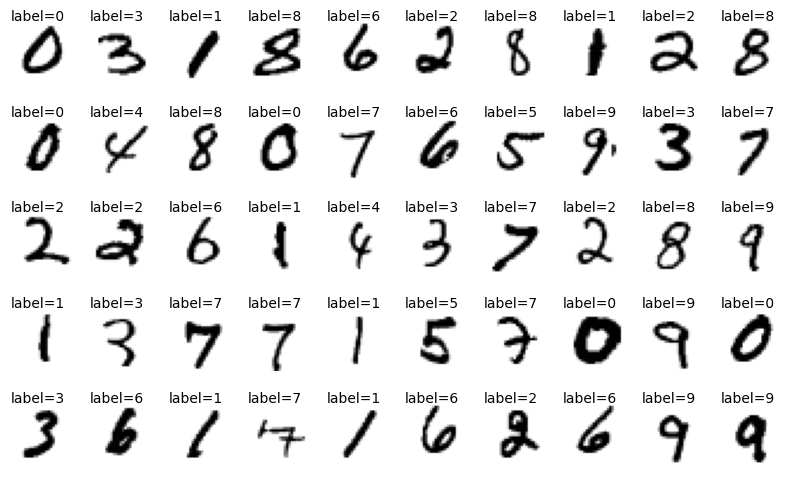

In [4]:
fig, axs = plt.subplots(5, 10, figsize=(10, 6))
for i in range(5):
    for j in range(10):
        idx = random.randint(0, 60000)
        axs[i, j].imshow(x_train[idx], cmap="gray_r")
        axs[i, j].axis("off")
        axs[i, j].text(0, 0, f"label={y_train[idx]}")
plt.show()

In [5]:
m_train, rows, cols = x_train.shape
m_test = x_test.shape[0]

x_train = x_train.reshape((m_train, rows * cols))
x_test = x_test.reshape((m_test, rows * cols))

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [20]:
def roc(model, method="decision_function"):
    y_scores = cross_val_predict(model, x_train, y_train_5, cv=3,
                                 method=method)
    precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
    idx_for_90_precision = (precisions >= 0.9).argmax()
    threshold_at_90_precision = thresholds[idx_for_90_precision]
    fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
    idx_for_threshold_at_90 = (thresholds <= threshold_at_90_precision).argmax()
    tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
    plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
    plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC Curve")
    plt.plot([fpr_90], [tpr_90], 'ko', label="Threshold for 90% precision")
    plt.legend()
    plt.show()
    print("AUC: ", roc_auc_score(y_train_5, y_scores))

# ROC curves

In [21]:
model1 = SGDClassifier(random_state=42)
model1.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

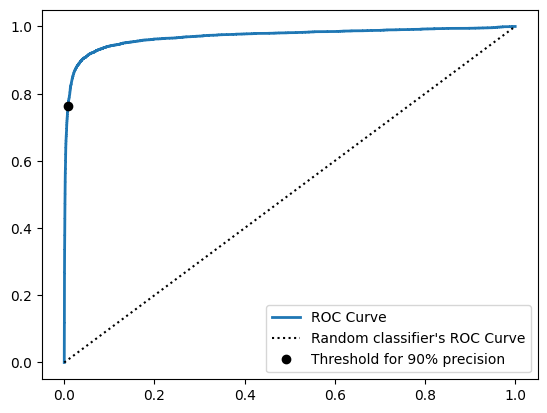

AUC:  0.9704522882419195


In [22]:
roc(model1)

In [ ]:
model2 = LogisticRegression(random_state=42)
model2.fit(x_train, y_train_5)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

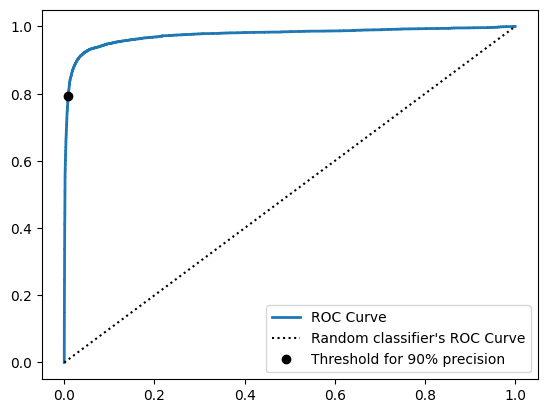

AUC:  0.9748062341893395


In [24]:
roc(model2)

In [25]:
model3 = RandomForestClassifier(random_state=42)
model3.fit(x_train, y_train_5)

RandomForestClassifier(random_state=42)

In [ ]:
roc(model3, method="predict_proba")